<a href="https://colab.research.google.com/github/janputra/Neural-Networks-Practice/blob/main/TF2_0_CIFAR_10_(improvement).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
cifar10= tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test)= cifar10.load_data()
x_train, x_test=x_train/255.0, x_test/255.0
y_train, y_test= y_train.flatten(), y_test.flatten()
print('x_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)

x_train shape : (50000, 32, 32, 3)
y_train shape : (50000,)


In [ ]:
K= len(set(y_train))
print('Number of Class : ',K)

Number of Class :  10


In [ ]:
i=Input(shape=x_train[0].shape)
x= Conv2D(32,(5,5), padding='same',activation='relu')(i)
x = BatchNormalization()(x)
x= Conv2D(32,(5,5), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x= Conv2D(32,(5,5), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x= MaxPooling2D((2,2))(x)
# x=Dropout(0.2)(x)
x= Conv2D(48,(5,5), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x= Conv2D(56,(5,5), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x= Conv2D(72,(5,5), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x= MaxPooling2D((2,2))(x)
# x=Dropout(0.2)(x)
x= Conv2D(80,(3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x= Conv2D(96,(3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x= Conv2D(128,(3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x= MaxPooling2D((2,2))(x)
# x=Dropout(0.2)(x)
x= Flatten()(x)
x=Dropout(0.2)(x)
x= Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K, activation='softmax')(x)

model= Model(i,x)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:

# r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=25)

Epoch 1/25
1562/1562 [==============================] - 28s 18ms/step - loss: 1.6448 - accuracy: 0.4215 - val_loss: 1.7192 - val_accuracy: 0.4716
Epoch 2/25
1562/1562 [==============================] - 28s 18ms/step - loss: 1.1697 - accuracy: 0.5885 - val_loss: 0.9846 - val_accuracy: 0.6597
Epoch 3/25
1562/1562 [==============================] - 28s 18ms/step - loss: 0.9682 - accuracy: 0.6659 - val_loss: 1.0381 - val_accuracy: 0.6575
Epoch 4/25
1562/1562 [==============================] - 28s 18ms/step - loss: 0.8562 - accuracy: 0.7067 - val_loss: 0.8931 - val_accuracy: 0.7053
Epoch 5/25
1562/1562 [==============================] - 28s 18ms/step - loss: 0.7587 - accuracy: 0.7421 - val_loss: 0.7297 - val_accuracy: 0.7519
Epoch 6/25
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6951 - accuracy: 0.7635 - val_loss: 0.8388 - val_accuracy: 0.7341
Epoch 7/25
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6323 - accuracy: 0.7869 - val_loss: 0.6930 -

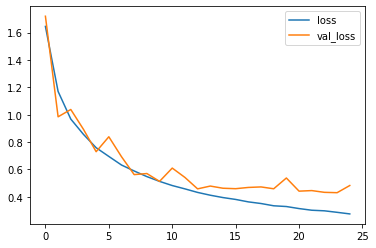

In [ ]:
hist =r.history

plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()

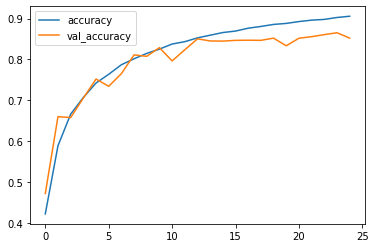

In [ ]:
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[852   7  41   6   3   0  11   4  64  12]
 [  3 963   2   0   0   0   5   0  10  17]
 [ 28   0 835  15  32  11  49  10  17   3]
 [ 21   5  60 692  34  41 107  15  20   5]
 [ 11   2  49  17 848   3  51  15   4   0]
 [  8   1  57 144  33 650  59  27  14   7]
 [  2   2  23   4   4   1 960   1   3   0]
 [ 14   0  23  13  35  12  11 879   6   7]
 [ 16   8   4   0   2   0   5   0 957   8]
 [ 11  50   2   2   0   0   9   2  39 885]]


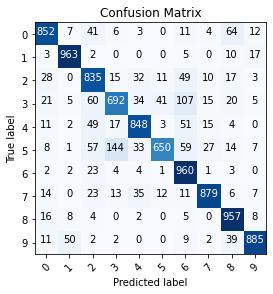

In [ ]:
#confussion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):


  if normalize:
    cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)


  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar
  tick_marks= np.arange(len(classes))

  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt ='.2f' if normalize else 'd'

  thresh = cm.max()/2


  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
               horizontalalignment='center',
               color='white' if cm[i,j]>thresh else 'black')
      
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.show()


p_test=model.predict(x_test).argmax(axis=1)
cm= confusion_matrix(y_test, p_test)

plot_confusion_matrix(cm,list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label : bird Predicted : airplane')

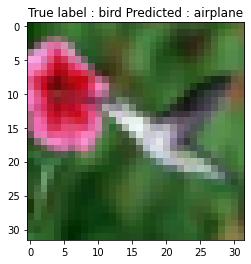

In [ ]:
#show misclassified examples

misclassified_idx= np.where(p_test!=y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label : %s Predicted : %s' % (labels[y_test[i]],labels[p_test[i]]))

In [ ]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)       